In [41]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")

In [15]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

In [16]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

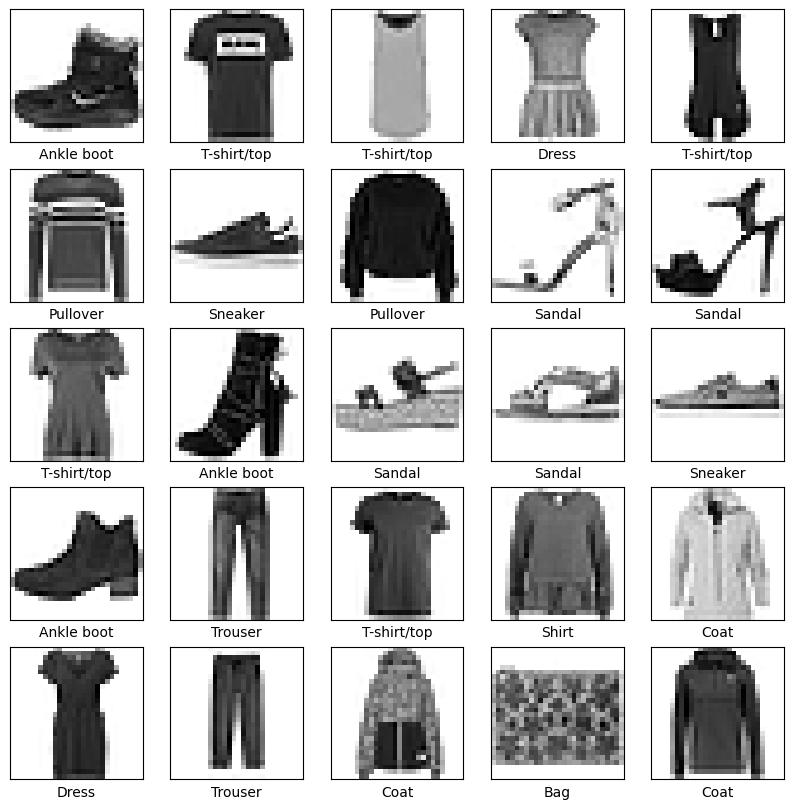

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])

In [24]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [25]:
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8016 - accuracy: 0.7317 - val_loss: 0.5793 - val_accuracy: 0.8042
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5141 - accuracy: 0.8217 - val_loss: 0.5136 - val_accuracy: 0.8243
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4600 - accuracy: 0.8404 - val_loss: 0.4411 - val_accuracy: 0.8495
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4240 - accuracy: 0.8529 - val_loss: 0.4451 - val_accuracy: 0.8444
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3988 - accuracy: 0.8612 - val_loss: 0.4192 - val_accuracy: 0.8628
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3770 - accuracy: 0.8684 - val_loss: 0.4537 - val_accuracy: 0.8471
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3625 - accuracy: 0.8733 - val_loss: 0.4079 - val_accuracy:

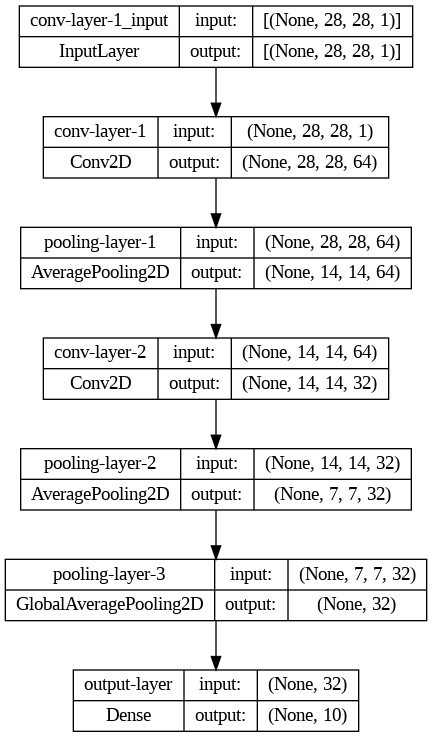

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv-layer-1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 pooling-layer-1 (AveragePo  (None, 14, 14, 64)        0         
 oling2D)                                                        
                                                                 
 conv-layer-2 (Conv2D)       (None, 14, 14, 32)        18464     
                                                                 
 pooling-layer-2 (AveragePo  (None, 7, 7, 32)          0         
 oling2D)                                                        
                                                                 
 pooling-layer-3 (GlobalAve  (None, 32)                0         
 ragePooling2D)                                                  
                                                      

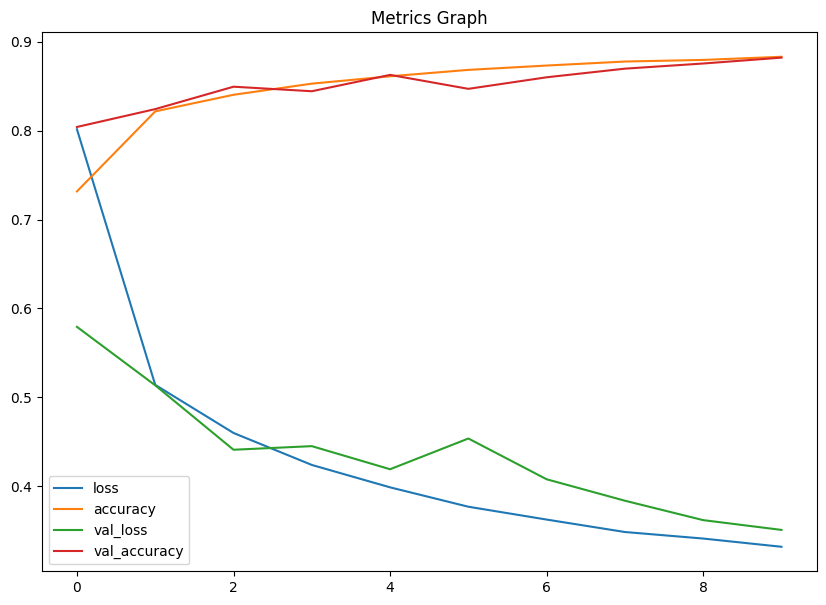

In [40]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [29]:
model.evaluate(testX, testY_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8822


[0.350904643535614, 0.8822000026702881]

In [30]:
predictions = model.predict(testX)

313/313 [==============================] - 1s 3ms/step


In [31]:
predictions = tf.argmax(predictions, axis=1)

In [35]:
y_test = tf.argmax(testY_cat, axis=1)

In [36]:
y_test = tf.Variable(y_test)

In [37]:
print(metrics.accuracy_score(y_test, predictions))

0.8822


In [38]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.85      0.82      1000
           3       0.83      0.91      0.87      1000
           4       0.74      0.86      0.79      1000
           5       0.97      0.97      0.97      1000
           6       0.82      0.52      0.64      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



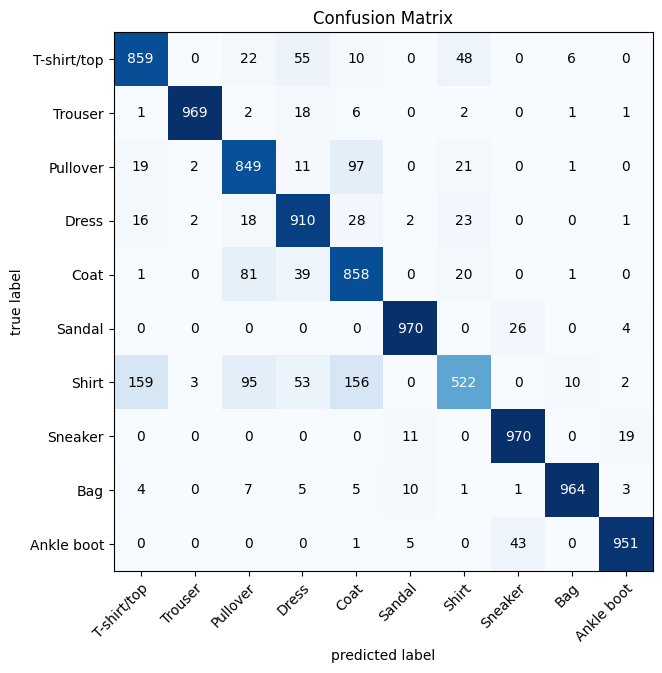

In [39]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 25ms/step


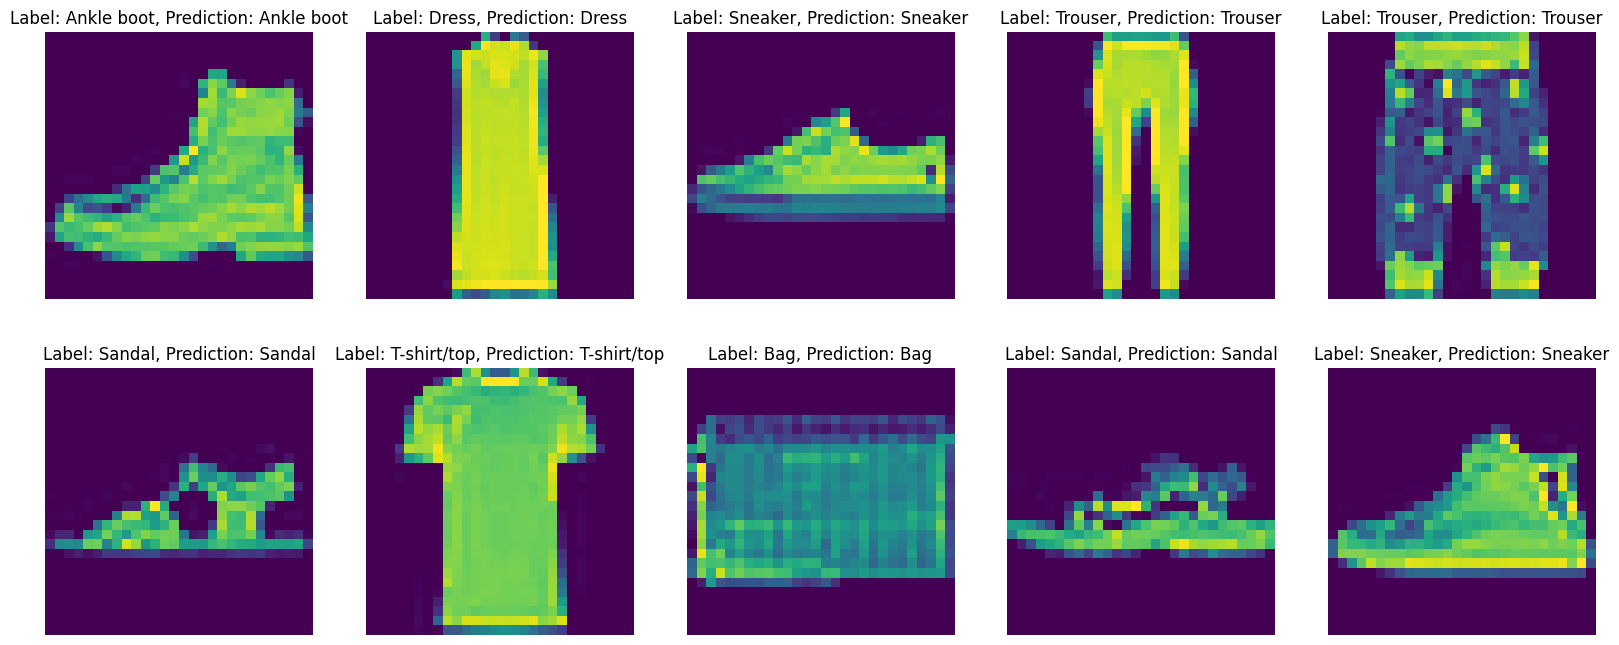

In [42]:
images = []
labels = []
random_indices = random.sample(range(len(testX)), 10)
for idx in random_indices:
    images.append(testX[idx])
    labels.append(testY_cat[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1